<a href="https://colab.research.google.com/github/luisfeliphe66/Sorteios_mega_sena/blob/main/Sorteios_mega_sena.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PROJETO MEGA SENA**

***Spark***

In [1]:
!apt-get update -qq
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q https://archive.apache.org/dist/spark/spark-3.1.2/spark-3.1.2-bin-hadoop2.7.tgz
!tar xf spark-3.1.2-bin-hadoop2.7.tgz
!pip install -q findspark

In [2]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.1.2-bin-hadoop2.7"

In [3]:
!pip install -q findspark

In [4]:
import findspark
!findspark.init();


/bin/bash: -c: line 1: syntax error near unexpected token `;'
/bin/bash: -c: line 1: `findspark.init();'


***Acessando o Spark UI (Google Colab)***

In [5]:
!from pyspark.sql import SparkSession

!spark = SparkSession.builder \
    .master('local[*]') \
    .appName("Iniciando com Spark") \
    .config('spark.ui.port', '4050') \
    .getOrCreate()

/bin/bash: line 1: from: command not found
/bin/bash: -c: line 1: syntax error near unexpected token `('
/bin/bash: -c: line 1: `spark = SparkSession.builder      .master('local[*]')      .appName("Iniciando com Spark")      .config('spark.ui.port', '4050')      .getOrCreate()'


In [6]:
!wget -q https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
!unzip ngrok-stable-linux-amd64.zip


Archive:  ngrok-stable-linux-amd64.zip
  inflating: ngrok                   


In [7]:
!pip install pyngrok
!from pyngrok import ngrok

/bin/bash: line 1: from: command not found


In [8]:
!ngrok authtoken "2iU4okZxuzJLCQMOE5sUdlAK29x_2JdshyZxxF2DDWoXyoEke"

Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [9]:
!ngrok.connect('4050')

/bin/bash: -c: line 1: syntax error near unexpected token `'4050''
/bin/bash: -c: line 1: `ngrok.connect('4050')'


In [10]:
!curl -s http://localhost:4040/api/tunnels

***Montando drive***

In [11]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


***Carregando os dados***

In [12]:
import zipfile

# Caminho para o arquivo ZIP que você deseja extrair
caminho_arquivo_zip = '/content/drive/MyDrive/curso-spark/MegaSena/base_mega_sena.zip'

# Diretório de destino onde deseja extrair os arquivos
diretorio_destino = '/content/drive/MyDrive/curso-spark/MegaSena/'

# Extrair os arquivos do arquivo ZIP para o diretório de destino
with zipfile.ZipFile(caminho_arquivo_zip, 'r') as zip_ref:
    zip_ref.extractall(diretorio_destino)

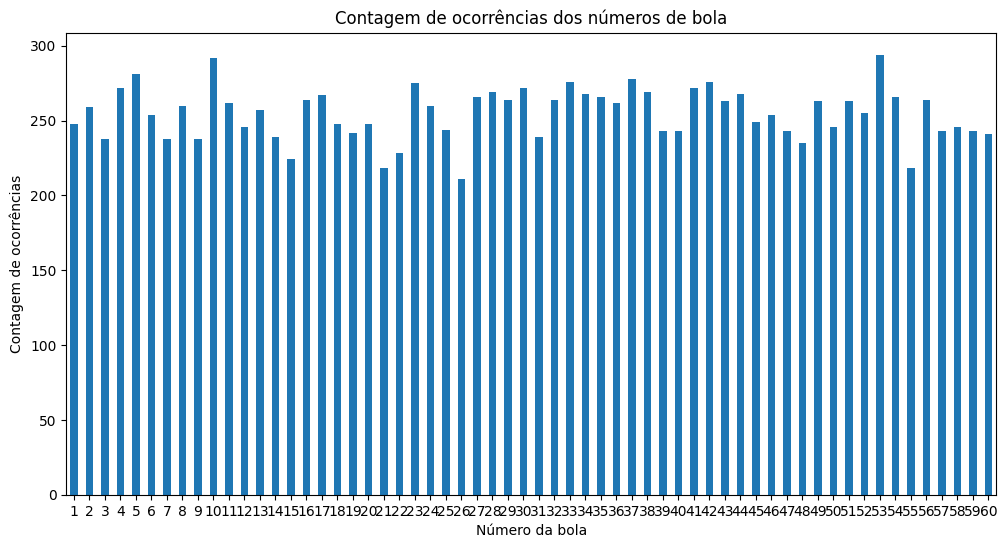

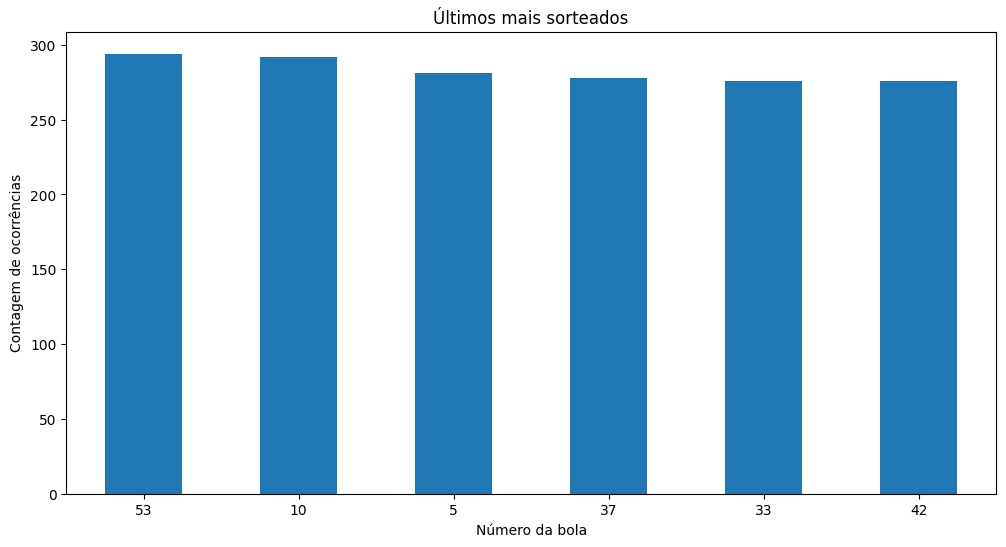


Seu numero da sorte é : 53 - 10 - 5 - 37 - 33 - 42


In [64]:
import pandas as pd
import zipfile
import os
import matplotlib.pyplot as plt

def delete_coluna_ordem(caminho_arquivo_zip, diretorio_destino):
    # Extrair os arquivos do arquivo ZIP para o diretório de destino
    with zipfile.ZipFile(caminho_arquivo_zip, 'r') as zip_ref:
        zip_ref.extractall(diretorio_destino)

    # Encontrar o nome do arquivo extraído
    nome_arquivo_extraido = None
    for nome in zip_ref.namelist():
        if nome.endswith('.csv'):
            nome_arquivo_extraido = os.path.join(diretorio_destino, nome)
            break

    if nome_arquivo_extraido:
        # Carregar o DataFrame a partir do arquivo CSV extraído
        df = pd.read_csv(nome_arquivo_extraido)

        # Deletar a coluna 'ordem' se existir
        if 'ordem' in df.columns:
            df = df.drop(columns=['ordem'])

        # Mostrar as colunas presentes no DataFrame
        # print("Colunas do DataFrame:")
        # print(df.columns)


        # Contar a frequência dos números de bola
        contagem_bolas = df['bola'].value_counts()
        # print(df.columns)
        # df = pd.DataFrame({"bola": contagem_bolas, "resultado": resultado_total})

        #Plotar o gráfico de barras com as contagens
        contagem_bolas.sort_index().plot(kind='bar', rot=0, figsize=(12, 6))
        plt.title('Contagem de ocorrências dos números de bola')
        plt.xlabel('Número da bola')
        plt.ylabel('Contagem de ocorrências')
        plt.show()


        ultimos_numeros = contagem_bolas.head(6)
        ultimos_numeros.plot(kind='bar', rot=0, figsize=(12, 6))
        plt.title('Últimos mais sorteados')
        plt.xlabel('Número da bola')
        plt.ylabel('Contagem de ocorrências')
        plt.show()

        print()

        #Ordena bolas que mais sairão
        sorted_group = contagem_bolas.sort_values(ascending=False)
        bola_1 = sorted_group[0:6].index[0]
        bola_2 = sorted_group[0:6].index[1]
        bola_3 = sorted_group[0:6].index[2]
        bola_4 = sorted_group[0:6].index[3]
        bola_5 = sorted_group[0:6].index[4]
        bola_6 = sorted_group[0:6].index[5]

        mensagem = f"Seu numero da sorte é : {bola_1} - {bola_2} - {bola_3} - {bola_4} - {bola_5} - {bola_6}"
        print(mensagem)

    else:
        print('Não foi possível encontrar um arquivo CSV dentro do ZIP.')

# Exemplo de uso da função
caminho_arquivo_zip = '/content/drive/MyDrive/curso-spark/MegaSena/base_mega_sena.zip'
diretorio_destino = '/content/drive/MyDrive/curso-spark/MegaSena/'

# Chamar a função para deletar a coluna 'ordem' e mostrar a contagem de ocorrências dos números de bola
delete_coluna_ordem(caminho_arquivo_zip, diretorio_destino)



